In [10]:
import pickle
from functools import partial
from os import listdir
from os.path import isfile, join

import numpy as np
import pandas as pd
import scipy
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

from common import CityResult
from file_name_generator import generate_new_name


Загрузка данных

In [11]:
mypath = '../clusters_results/2024_06_17_500points'

In [12]:
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

r : dict[str:CityResult]= {}
for name in onlyfiles:
    if 'ASHA' in name:
        continue
    with open(join(mypath, name), 'rb') as f:
        r[name] = pickle.load(f)
        f.close()

Обработка данных

In [17]:
from numpy import poly1d

nodes2C = {}
nodes = []
alpha_max = []
data_x = {}
data_y ={}
data_err = {}
for name in r:
    res:CityResult = r[name]
    # print('mean centroids b:', np.mean([p.centroid_edges/p.centroid_nodes for p in res.points_results]),'+-',
    #       np.std([p.centroid_edges/p.centroid_nodes for p in res.points_results]))
    X = [p.alpha for p in res.points_results]
    A = [p.speed_up[0] for p in res.points_results]
    E = [np.mean(p.errors) for p in res.points_results]

    # fig, axs = plt.subplots(1, 1)
    # fig.set_figwidth(25)
    # fig.set_figheight(15)
    # axs = [axs]
    # for p in res.points_results:
    #     print('wee',np.mean(p.errors), np.std(p.errors))
    # print()
    # axs[1].errorbar(X, E, fmt='o', label = "{}: {}".format(name, r[name].nodes))
    # axs[1].set(xlabel='alpha', ylabel='Err')
    # axs[1].legend()
    N = int(res.nodes)
    d = res.density
    alpha = np.argmax(A)
    if N not in data_x:
        data_x[N] = []
        data_y[N] = []
        data_err[N] = []
    data_x[N].append(d)
    data_err[N].append(E[np.argmax(A)])
    # data_y[N].append(X[alpha])
    alpha_max.append(X[alpha])
    nodes.append(res.nodes)
    # def ax(x, c1=1,c2 =1):
    #     # x = x/1.25
    #     b1 = np.mean([p.centroid_edges/p.centroid_nodes for p in res.points_results])
    #     b0 = res.edges/res.nodes
    #     xx = 0.01
    #     # print(c1/np.sqrt(xx*N)*(1-np.log(xx)/np.log(N)) ,xx*b1/b0*(1+np.log(xx)/np.log(N)) , 1*(1 + b0)/(np.sqrt(xx*N)*b0*np.lg(N)))
    #     k = c1/np.sqrt(x*N)*(1-np.log(x)/np.log(N)) + x*b1/b0*(1+np.log(x)/np.log(N)) + c2/x*(1 + b0)/(np.sqrt(x*N)*b0*np.log(N))        return 1/k

    # popt = curve_fit(ax, X,A, p0 = [1,1], bounds=(0.0001,10))
    # print(name, popt[0])
    # nodes2C[N] = popt[0]
    
    z = np.polyfit(X, A, 3)
    x = np.linspace(1/N,0.2,5000)
    # q = popt[1]
    # # q = [5]
    # y = ax(x, *popt[0])
    y = poly1d(z)(x)
    # data_y[N].append(X[alpha])
    alpha = np.argmax(y)
    data_y[N].append(np.max(y))
    
    
    # print(res.nodes,x[np.argmax(y)], X[np.argmax(A)])
    # axs[0].errorbar(x, y)
    # axs[0].errorbar(X, A, fmt='o', label = "{}".format(name))
    # axs[0].set(xlabel='alpha', ylabel='ускорение')
    # axs[0].legend()
    # 
    # 
    # # print(res.nodes, X[alpha]
    # fig.patch.set_alpha(1)

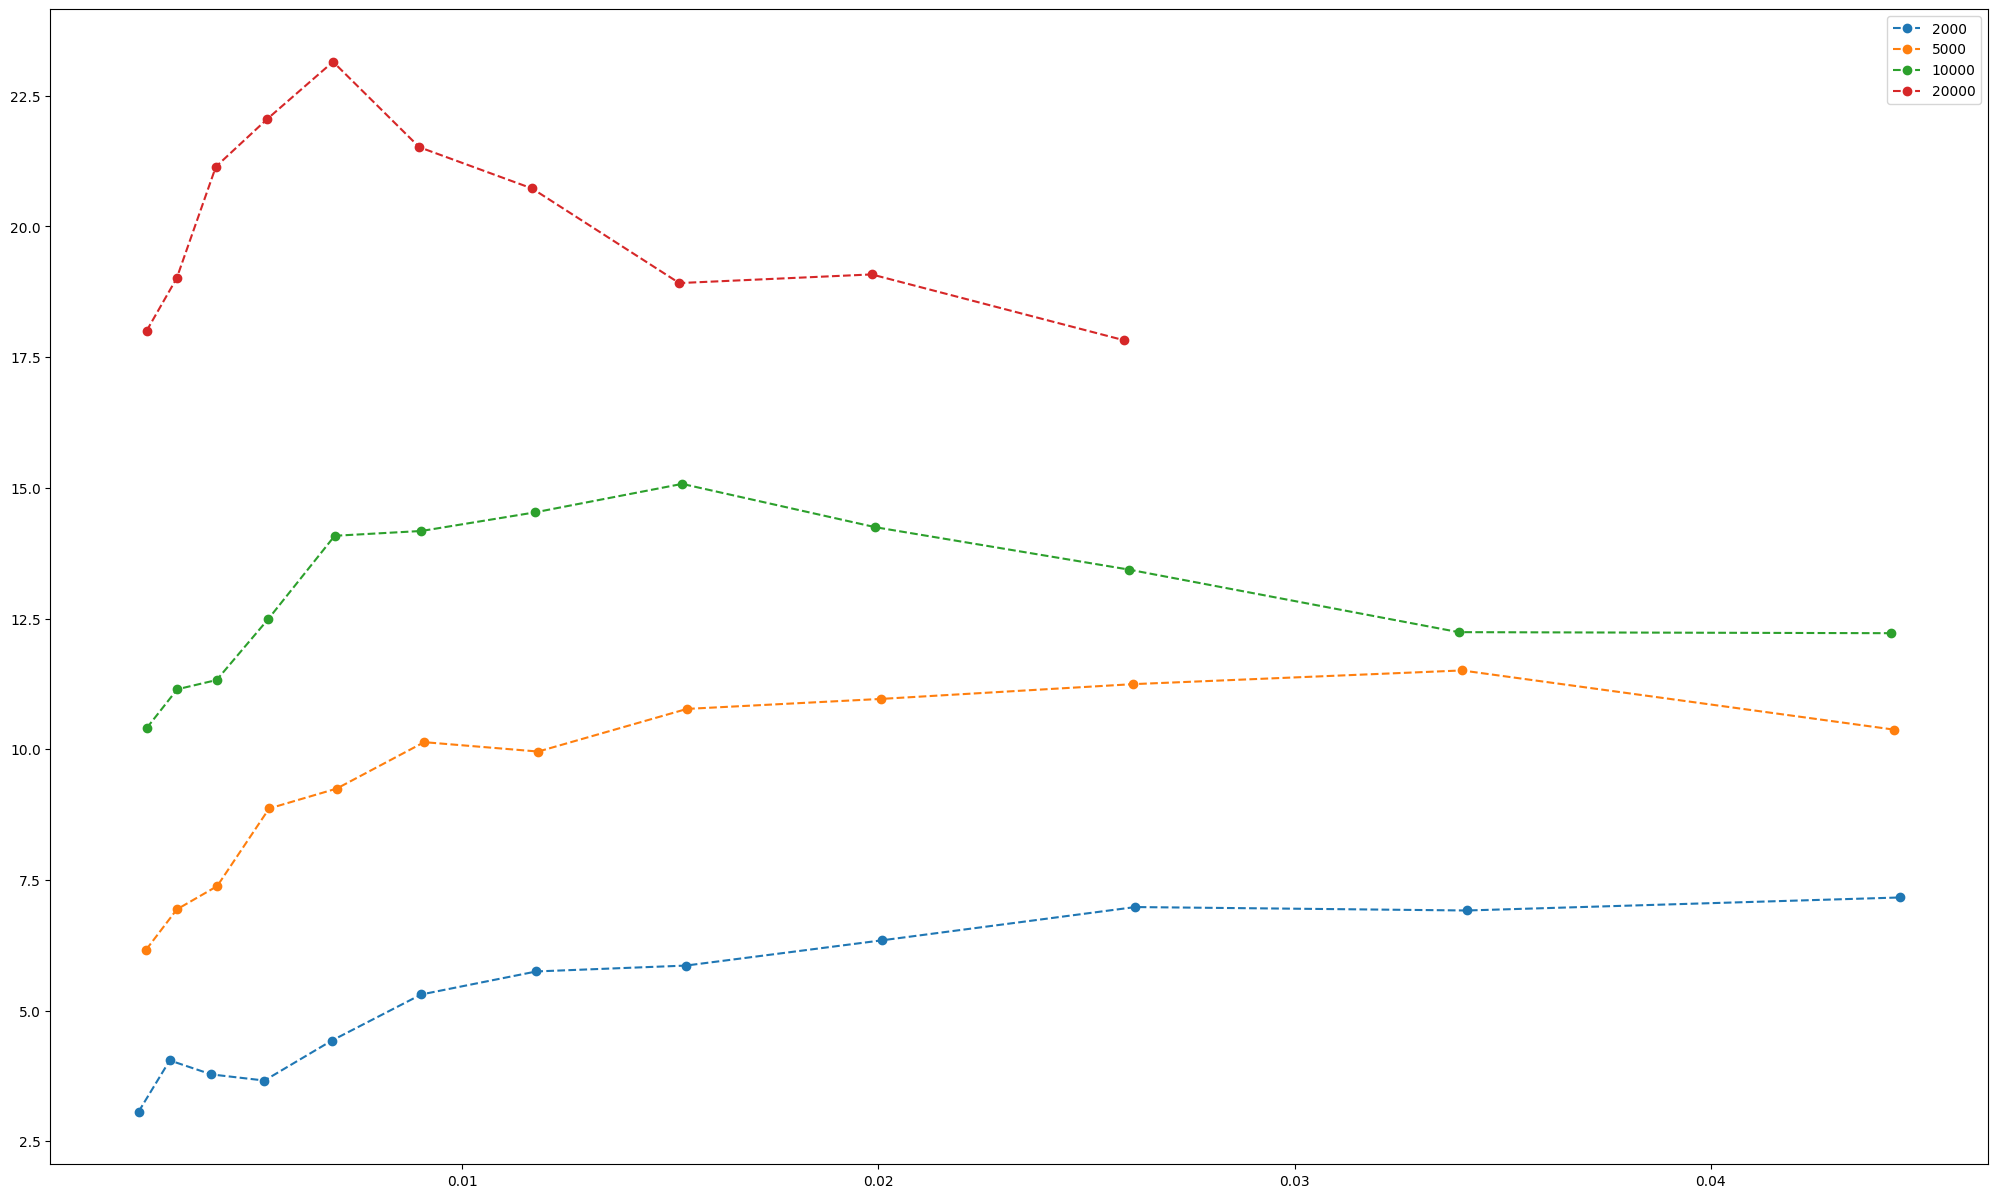

In [18]:
fig, axs = plt.subplots(1, 1)
fig.set_figwidth(25)
fig.set_figheight(15)
axs = [axs]
data_x = list(data_x.items())
data_x.sort(key = lambda x:x[0])
data_x = dict(data_x)
data_y = list(data_y.items())
data_y.sort(key = lambda x:x[0])
data_y = dict(data_y)

for n in data_x:
    xx = np.argsort(data_x[n])
    axs[0].plot(np.array(data_x[n])[xx], np.array(data_y[n])[xx],'--o', label = f'{n}')
axs[0].legend()

plt.rcParams.update({'font.size': 20})
fig.patch.set_alpha(1)
plt.show()

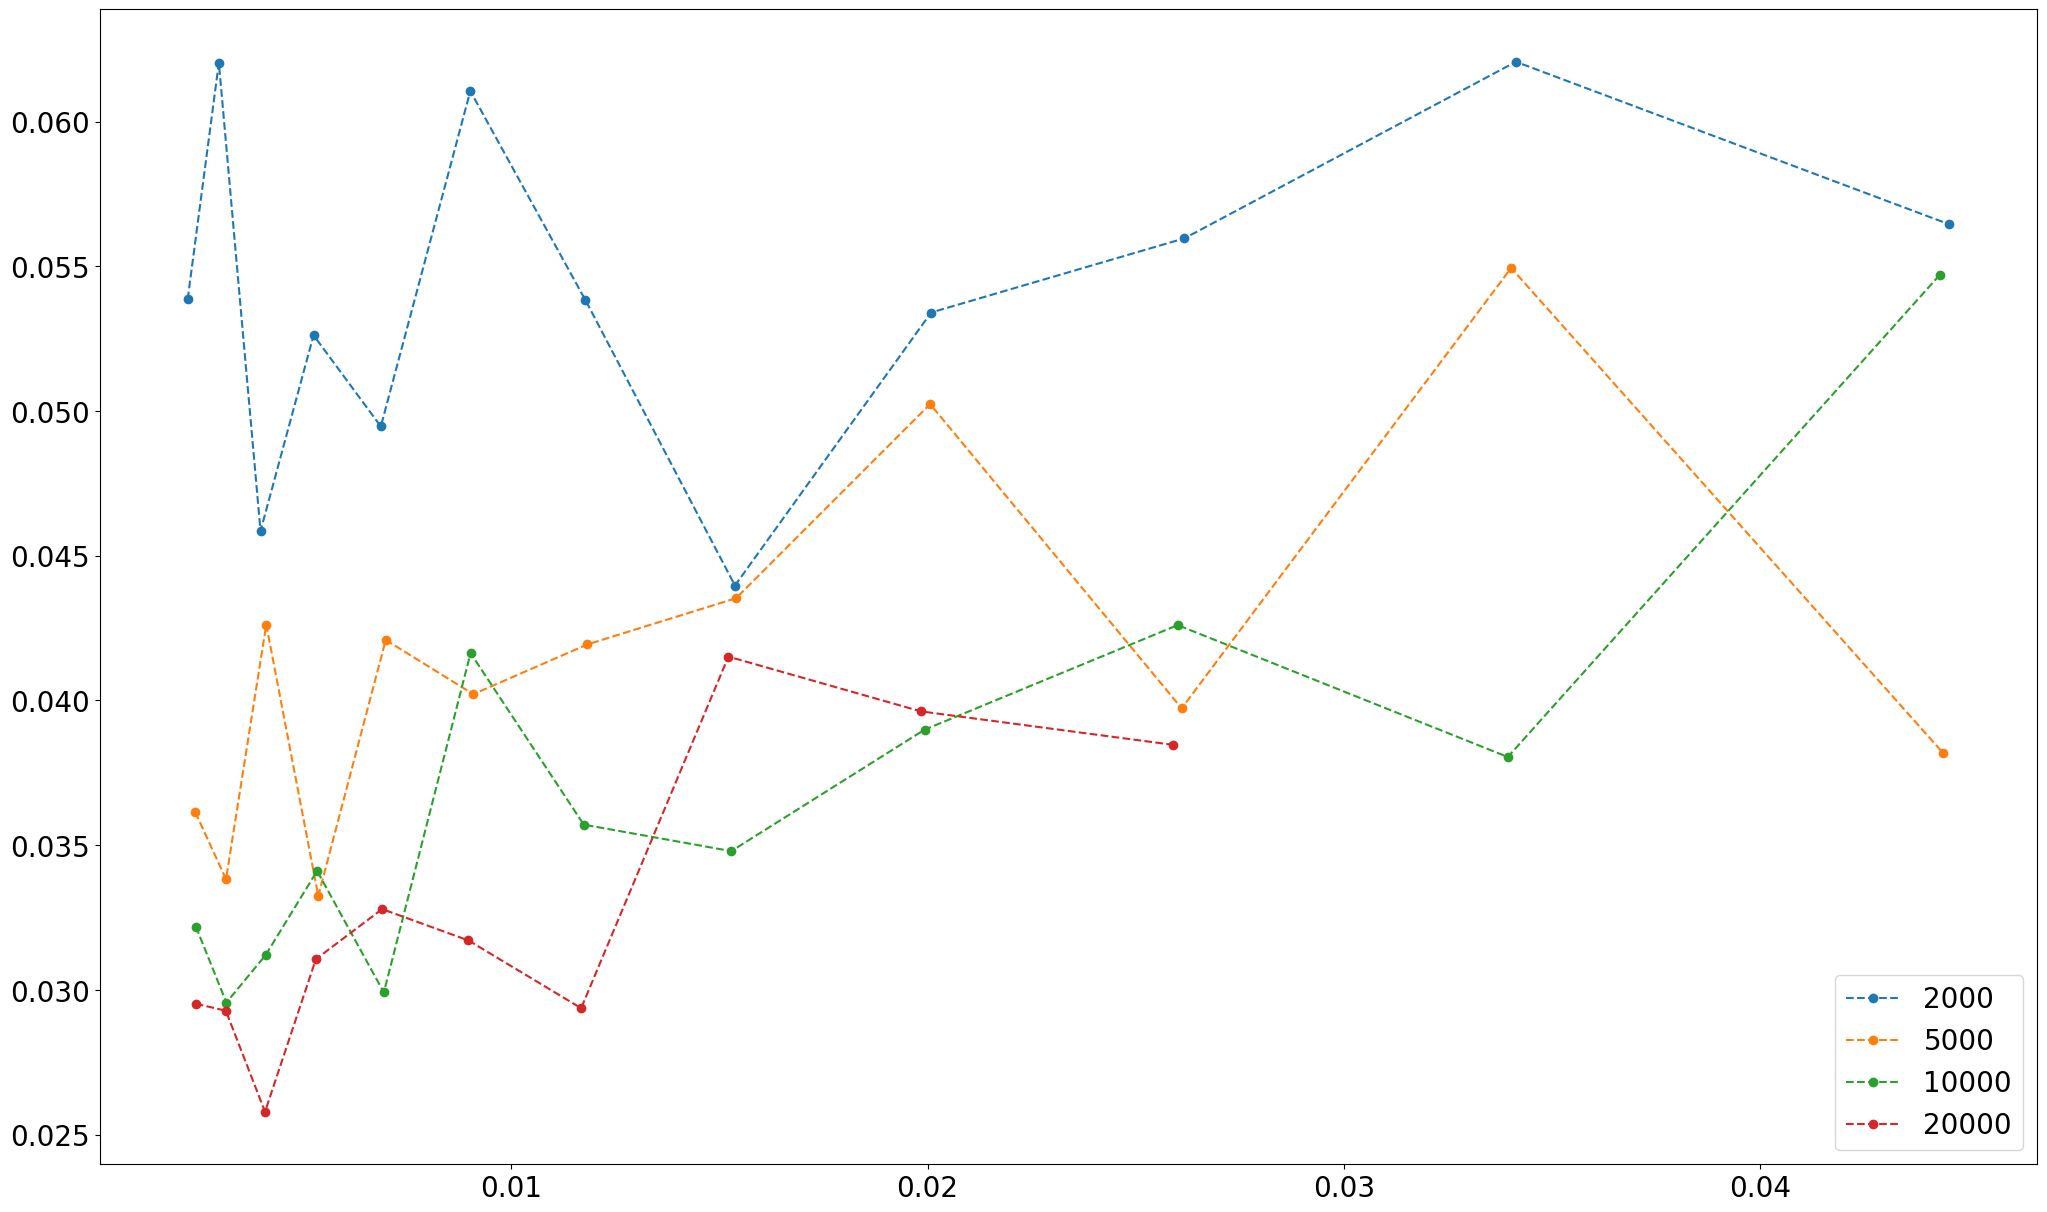

In [19]:
fig, axs = plt.subplots(1, 1)
fig.set_figwidth(25)
fig.set_figheight(15)
axs = [axs]
data_x = list(data_x.items())
data_x.sort(key = lambda x:x[0])
data_x = dict(data_x)
data_err = list(data_err.items())
data_err.sort(key = lambda x:x[0])
data_err = dict(data_err)

for n in data_x:
    xx = np.argsort(data_x[n])
    axs[0].plot(np.array(data_x[n])[xx], np.array(data_err[n])[xx],'--o', label = f'{n}')
axs[0].legend()

plt.rcParams.update({'font.size': 20})
fig.patch.set_alpha(1)
plt.show()

In [ ]:
for N in [1000,2000,3000,4000,5000,10000,20000,40000,70000,100000]:

    def func(x):
         return 1/(2/np.sqrt(x*N)*(1-np.log(x)/np.log(N)) + x*2/1.5*(1+np.log(x)/np.log(N)) + 1*(1 + 1.5)/(np.sqrt(x*N)*1.5*np.log(N)))

    def x0(a0 = (4/N)**(1/3)):
        a1 = 1/4/1.5/np.log(N) * (1.5 * (2 /3 * 2*np.log(2) - 8 /3*np.log(N) -5) + 4/3 * 2 *(np.log(4) + 2*np.log(N) +3) -1)
        a2 = 1/16/(2)**(2/3)/1.5/np.log(N)/(1/N)**(1/3) * (1.5 * (-4 *np.log(2) +8*np.log(N) +19) + 8 * 2+3)
        # a0 =  (4/N)**(1/3)
        return a0 -a1/2/a2

    def xx0(a0 = (4/N)**(1/3)):
        b1 = 2
        b0 = 1.5
        x = a0
        d1 = (2 *b1* np.sqrt(N)* x**(3/2) *(np.log(N) + np.log(x) + 1) + b0*(-2*np.log(N) + 2* np.log(x) - 5) - 1)/(2* b0*np.sqrt(N)* x**(3/2)*np.log(N))
        d2 = (4 * b1 *np.sqrt(N)* x**(3/2) + b0* (6* np.log(N) - 6*np.log(x) + 19) + 3)/(4* b0 *np.sqrt(N) *x**(5/2)*np.log(N))
        return -d1/2/d2 + x



    x = np.linspace(1/N,1,1000)
    y = func(x)
    print(N,'actual',x[np.argmax(y)],'fitted',xx0(a0=xx0()), 'delta',abs(x[np.argmax(y)] - xx0(a0=xx0(a0=xx0(xx0(a0=xx0(a0=xx0()))))))/x[np.argmax(y)] * 100,'%')

In [ ]:
N = 10000
def func(x0 = (4/N)**(1/3)):
    b1 = 2
    b0 = 1.5
    x = x0
    d1 = (2 *b1* np.sqrt(N)* x**(3/2) *(np.log(N) + np.log(x) + 1) + b0 (-2*np.log(N) + 2* np.log(x) - 5) - 1)/(2* b0*np.sqrt(N)* x**(3/2)*np.log(N))
    d2 = (4 * b1 *np.sqrt(N)* x**(3/2) + b0 (6* np.log(n) - 6*np.log(x) + 19) + 3)/(4* b0 *np.sqrt(N) *x**(5/2)*np.log(N))
    return -d1/2/d2 + x0




In [ ]:
fig, axs = plt.subplots(1, 1)
fig.set_figwidth(25)
fig.set_figheight(7)

axs.set(xlabel='alpha', ylabel='A')
axs.legend()

def f(x):
    return 2/np.sqrt(x*N)*(1-np.log(x)/np.log(N)) + x*2/1.5*(1+np.log(x)/np.log(N)) + 1*(1 + 1.5)/(np.sqrt(x*N)*1.5*np.log(N))

x = np.linspace(min(nodes), max(nodes), 1000)
y = 43.5*f(x)
axs.errorbar(x, y, fmt='o', label = "{}: {}".format(name, r[name].nodes))
axs.errorbar(nodes, alpha_max, fmt='o', label = "{}: {}".format(name, r[name].nodes))


In [ ]:
print(f(10000)*2)
print(f(20000)*2)
print(f(30000)*2)
print(f(40000)*2)
print(f(50000)*2)
print(f(60000)*2)
print(f(70000)*2)


In [ ]:
from common import CentroidResult
data = {'a' : [], 'b': [], 'N': [], 'density': []}
for name in r:
    res: CityResult = r[name]
    X_r = []
    Y_a = []
    for p_r in res.points_results:
        point_res : CentroidResult = p_r
        X_r.append(point_res.resolution)
        Y_a.append(point_res.alpha)

    fig, axs = plt.subplots(1, 1)
    fig.set_figwidth(25)
    fig.set_figheight(7)

    axs.errorbar(X_r, Y_a, fmt='o', label = "{}: {}".format(name, r[name].nodes))
    axs.set(xlabel='resolution', ylabel='alpha')

    popt = curve_fit(func, X_r, Y_a)
    XX = np.linspace(0,10000,10000)
    YY = func(XX, popt[0][0], popt[0][1])
    axs.errorbar(XX, YY)
    print(popt[0][0])
    data['a'].append(popt[0][0])
    data['b'].append(popt[0][1])
    data['N'].append(res.nodes)
    data['density'].append(res.density)

In [ ]:
fig, axs = plt.subplots(1, 3)
fig.set_figwidth(25)
fig.set_figheight(7)

axs[0].errorbar( np.array(data['density']), data['a'], fmt='o')
axs[1].errorbar(np.array(data['density']) * np.array(data['N']) *(np.array(data['N'])-1), data['b'], fmt='o')

axs[2].errorbar(data['b'], data['a'], fmt='o')

x= np.array(data['density']) * np.array(data['N']) *(np.array(data['N'])-1)
popt = curve_fit(func, np.array(data['density']) * np.array(data['N']) *(np.array(data['N'])-1), data['b'],p0=[-2, 0.01])
XX = np.linspace(min(x),max(x),10000)
YY = func(XX, popt[0][0], popt[0][1])
axs[1].errorbar(XX, YY)

print(popt)

# axs.set(xlabel='resolution', ylabel='alpha')


In [ ]:
def theory_func(x,c, g, N = 9574, b0 = 1):
    x = x * c
    q = np.log(x) / np.log(N)
    return g / (x / b0 * (1 + q) + c / (np.sqrt(x * N)) * (1 - q))

In [ ]:
X_a = {}
Y_err = {}
Y_err_std = {}

Y_speedup = {}

for name in r:
    result: CityResult = r[name]
    X_a[name] = [a.alpha for a in result.points_results]
    Y_err[name] = [np.mean(a.errors) for a in result.points_results]
    Y_err_std[name] = [np.std(a.errors) for a in result.points_results]
    Y_speedup[name] = [np.mean(a.speed_up) for a in result.points_results]

Графики:

In [ ]:
city_to_n = {}
X_max = {}
Y_speedup_max = {}
Y_err_speedup = {}

c = {}
b = {}
for name in r:
    fig, axs = plt.subplots(1, 3)
    fig.set_figwidth(25)
    fig.set_figheight(7)

    axs[0].errorbar(X_a[name], Y_speedup[name], fmt='o', label = "{}: {}".format(name, r[name].nodes))
    axs[0].set(xlabel='alpha'+ str(r[name].density), ylabel='ускорение')

    func_r = partial(theory_func, N=r[name].nodes, b0=r[name].edges/r[name].nodes)
    print(str(r[name].nodes) + ' ' + str(r[name].edges/r[name].nodes))
    print(str(r[name].nodes) + ' ' + str(2*r[name].edges/(r[name].nodes * (r[name].nodes-1))))

    _x = np.array(X_a[name])
    _x = _x[_x < 0.6]
    _xx = np.linspace(min(_x), max(_x), 100)


    _y = np.array(Y_speedup[name])[0:len(_x)]
    popt = curve_fit(func_r, _x, _y, p0=[0.0003, 4],bounds=(0,[10,1000]))
    # if 'ASHA' in name:
    #     func_target = partial(theory_func, c=0.00005, g=25,N=r[name].nodes, b0=r[name].density)
    # else:
    func_target = partial(theory_func, c=popt[0][0], g=popt[0][1],N=r[name].nodes, b0=r[name].edges/r[name].nodes)
    a = scipy.optimize.fminbound(lambda x: -func_target(x), 0, 0.5)
    city_to_n[name] = r[name].nodes
    X_max[name] = a
    Y_speedup_max[name] = func_target(a)

    c[name] = popt[0][0]
    b[name] = popt[0][1]

    _y = func_target(np.array(_xx))
    axs[0].errorbar(_xx, _y, linewidth=3, label = "c:{}\n g:{}".format(popt[0][0],popt[0][1]))
    axs[0].legend()
    axs[1].errorbar(X_a[name], Y_err[name], fmt='o')
    axs[1].set(xlabel='alpha' + str(r[name].density), ylabel='средняя относительная ошибка')
    z = np.polyfit(X_a[name], Y_err[name], 6)
    p = np.poly1d(z)
    axs[1].errorbar(_xx, p(_xx), fmt='o')
    Y_err_speedup[name] = p(a)



    axs[2].errorbar(X_a[name], Y_err_std[name], fmt='o')
    axs[2].set(xlabel='alpha'+ str(r[name].density), ylabel='погрешность ошибки')

    # file_name = generate_new_name(name + '.png', 'plots')

    # plt.savefig(file_name)

Построим график ускорения от плотности

In [ ]:
# X_max = {}
# Y_speedup_max = {}
# Y_err_speedup = {}

def t_f(x, N, b):
    return

fig, axs = plt.subplots(1, 5)
fig.set_figwidth(30)
fig.set_figheight(7)


X_betta = [city_to_n[name] for name in city_to_n]
Y_betta_speedup =[Y_speedup_max[n] for n in Y_speedup_max]
Y_betta_err =[Y_err_speedup[n] for n in Y_err_speedup]

Y_c = [c[name] for name in c]
Y_b = [b[name] for name in b]

axs[0].errorbar(X_betta, Y_betta_speedup, fmt='o')
axs[0].set(xlabel='плотность', ylabel='максимальное ускорение')


axs[1].errorbar(X_betta, Y_betta_err, fmt='o')
axs[1].set(xlabel='плотность', ylabel='относительная ошибка при максимаольном кскорении')



axs[2].errorbar(X_betta, Y_c, fmt='o')
axs[2].set(xlabel='плотность', ylabel='c')
X_betta = [r[n].density for n in r]

axs[3].errorbar(X_betta, Y_b, fmt='o')
axs[3].set(xlabel='плотность', ylabel='b')


axs[4].errorbar(X_betta, [X_max[name] for name in X_max], fmt='o')
axs[4].set(xlabel='плотность', ylabel='alpha')

plt.show()

In [ ]:
def line(x, a,b):
    return a*x + b

def line_predict(x, a,b,alpha, N):
    # print("a:{:.2f} n:{:.2f}".format(alpha, N))
    return a*x/(alpha * (1 + np.log(alpha)/np.log(N))) + b

def inverse(x,a,b,c):
    return a*(x**c) + b

Уберем последние 4 точки

In [ ]:
# X_max = {}
# Y_speedup_max = {}
# Y_err_speedup = {}

fig, axs = plt.subplots(1, 2)
fig.set_figwidth(25)
fig.set_figheight(7)

X_max_1 = dict(list(X_max.items())[0:-5])
X_betta = [r[n].density for n in r][0:-5]
Y_betta_speedup =[Y_speedup_max[n] for n in Y_speedup_max][0:-5]
Y_betta_err =[Y_err_speedup[n] for n in Y_err_speedup][0:-5]

axs[0].errorbar(X_betta, Y_betta_speedup, fmt='o')
axs[0].set(xlabel='плотность', ylabel='максимальное ускорение')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(X_betta,Y_betta_speedup)

_x = np.linspace(min(X_betta), max(X_betta))
_y = slope * _x + intercept
axs[0].errorbar(_x, _y,label = '{:.2f}x + {:.2f}. R2:{:.4f}'.format(slope,intercept, r_value**2))
axs[0].legend()


# _x = X_betta
# f = partial(line_predict, N = [r[name].nodes for name in r][0])
# _y = []
# for i,a in enumerate(X_max_1):
#     _y.append(f(_x[i], slope/15, intercept, X_max_1[a]))
#
# axs[0].errorbar(_x, _y, fmt = 'o')
# axs[0].legend()



axs[1].errorbar(X_betta, Y_betta_err, fmt='o')
axs[1].set(xlabel='плотность', ylabel='относительная ошибка при максимаольном кскорении')

popt = curve_fit(inverse, X_betta, Y_betta_err, p0=[0.000000015, -1.5,0.06])
_xx = np.linspace(min(X_betta), max(X_betta), 300)
_yy = inverse(_xx, *popt[0])
axs[1].errorbar(_xx, _yy,label = '{:.10f}x^(-2) + {:.4f}'.format(popt[0][0],popt[0][1]))
axs[1].legend()
plt.show()

In [14]:
from graph_generator import get_graph

H = get_graph('R2555133')


KeyError: 'PlanePoints_20000_0.0031.pkl'

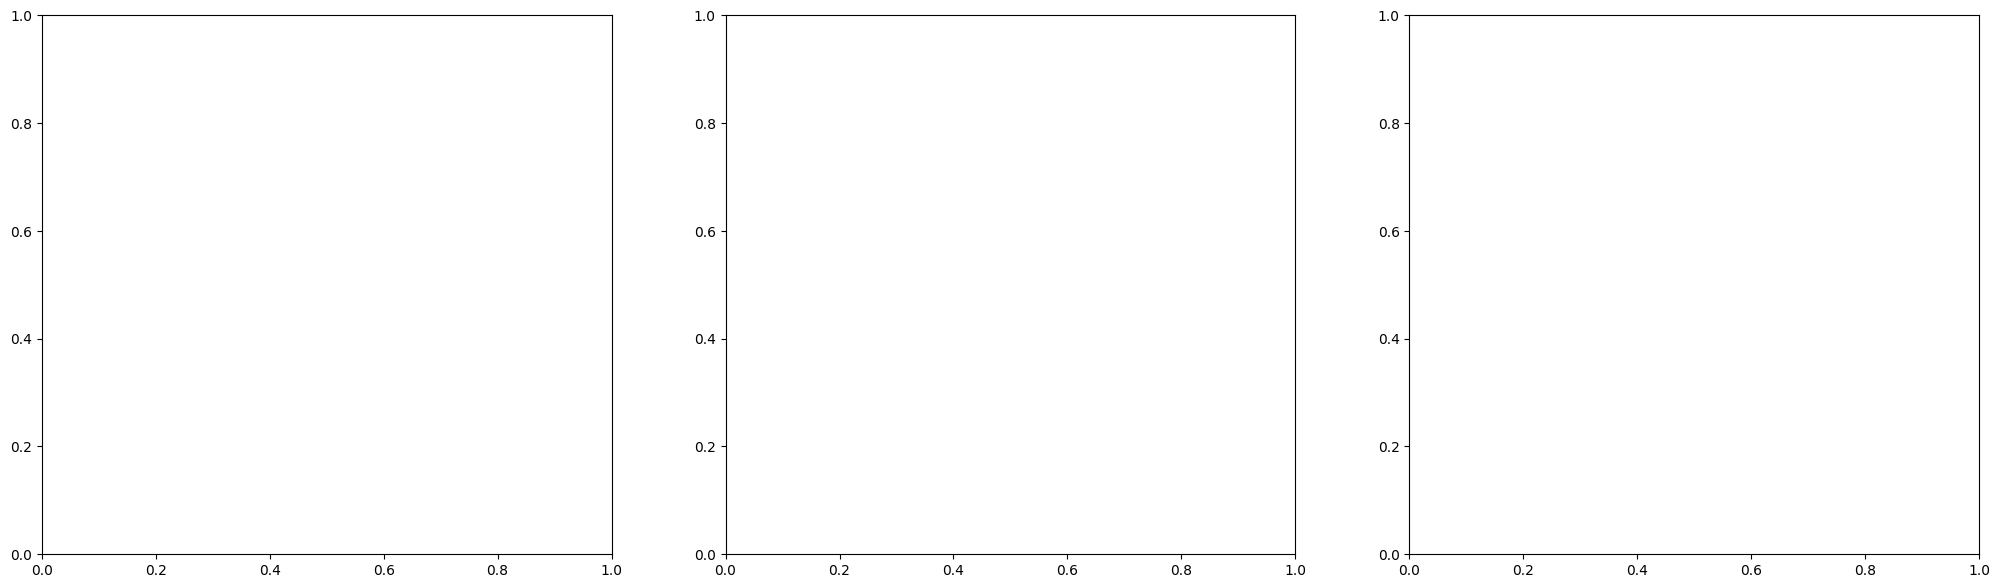

In [15]:
def _f(x, N):
    q = np.log(x) / np.log(N)
    return 1 / (x * (1 + q) + 1 / (np.sqrt(x * N)) * (1 - q))

for name in r:
    fig, axs = plt.subplots(1, 3)
    fig.set_figwidth(25)
    fig.set_figheight(7)

    axs[0].errorbar(X_a[name], Y_speedup[name], fmt='o', label = "{}: {}".format(name, r[name].nodes))
    axs[0].set(xlabel='alpha'+ str(r[name].density), ylabel='ускорение')

    # func_r = partial(theory_func, N=r[name].nodes, b0=r[name].edges/r[name].nodes)
    # print(str(r[name].nodes) + ' ' + str(r[name].edges/r[name].nodes))
    # print(str(r[name].nodes) + ' ' + str(2*r[name].edges/(r[name].nodes * (r[name].nodes-1))))

    _x = np.array(X_a[name])
    _x = _x[_x < 0.6]
    _xx = np.linspace(min(_x), max(_x), 100)

    func_target = partial(_f, N=r[name].nodes)
    _y = func_target(np.array(_xx))
    axs[0].errorbar(_xx, _y, linewidth=3)
    axs[0].legend()
    # axs[1].errorbar(X_a[name], Y_err[name], fmt='o')
    # axs[1].set(xlabel='alpha' + str(r[name].density), ylabel='средняя относительная ошибка')
    # z = np.polyfit(X_a[name], Y_err[name], 6)
    # p = np.poly1d(z)
    # axs[1].errorbar(_xx, p(_xx), fmt='o')
    # Y_err_speedup[name] = p(a)
    #
    #
    #
    # axs[2].errorbar(X_a[name], Y_err_std[name], fmt='o')
    # axs[2].set(xlabel='alpha'+ str(r[name].density), ylabel='погрешность ошибки')

    # file_name = generate_new_name(name + '.png', 'plots')

    # plt.savefig(file_name)

In [ ]:
def _f(x, N):
    q = np.log(x) / np.log(N)
    return 1 / (x * (1 + q) + 1 / (2*np.sqrt(x * N)) * (1 - q))

arr_N = [i for i in range(10000, 100000,100)]
y = []
for i in arr_N:
    func_target = partial(_f, N=i)
    a = scipy.optimize.fminbound(lambda x: -func_target(x), 0, 1)
    y.append(func_target(a))

fig, axs = plt.subplots(1, 1)
fig.set_figwidth(25)
fig.set_figheight(7)

axs.errorbar(arr_N, y, linewidth=3,label='a')
axs.errorbar(arr_N, (np.array(arr_N)) ** 0.317 -1.5, linewidth=3, label = 'b')
axs.legend()
